In [59]:
from google.colab import drive
drive.mount('/content/gdrive')
import os, sys
from IPython.display import display
from IPython.display import Image as _Imgdis # PIL의 Image와 이름이 동일하여 다르게 짓는다
from PIL import Image # PIL은 pip install pillow로 설치
import numpy as np

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [60]:
folder = '/content/gdrive/MyDrive/pytest_img/mnist_jpg'

# 해당 폴더 내에서 파일에 해당하는 것들의 목록을 구한다
files = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
print(files)
print("Working with {0} images".format(len(files)))

['img_0_ (1).jpg', 'img_0_ (5).jpg', 'img_0_ (2).jpg', 'img_0_ (8).jpg', 'img_0_ (10).jpg', 'img_0_ (4).jpg', 'img_0_ (6).jpg', 'img_0_ (3).jpg', 'img_0_ (7).jpg', 'img_1_ (10).jpg', 'img_1_ (6).jpg', 'img_1_ (3).jpg', 'img_1_ (4).jpg', 'img_1_ (8).jpg', 'img_1_ (9).jpg', 'img_1_ (2).jpg', 'img_2_ (1).jpg', 'img_0_ (9).jpg', 'img_1_ (5).jpg', 'img_1_ (1).jpg', 'img_1_ (7).jpg', 'img_2_ (3).jpg', 'img_3_ (10).jpg', 'img_2_ (2).jpg', 'img_2_ (5).jpg', 'img_2_ (8).jpg', 'img_2_ (7).jpg', 'img_3_ (4).jpg', 'img_2_ (6).jpg', 'img_2_ (9).jpg', 'img_3_ (3).jpg', 'img_2_ (4).jpg', 'img_2_ (10).jpg', 'img_3_ (2).jpg', 'img_3_ (1).jpg', 'img_3_ (5).jpg', 'img_4_ (2).jpg', 'img_3_ (9).jpg', 'img_4_ (1).jpg', 'img_3_ (8).jpg', 'img_3_ (7).jpg', 'img_4_ (10).jpg', 'img_4_ (3).jpg', 'img_4_ (6).jpg', 'img_4_ (5).jpg', 'img_4_ (4).jpg', 'img_3_ (6).jpg', 'img_5_ (2).jpg', 'img_5_ (3).jpg', 'img_4_ (7).jpg', 'img_5_ (6).jpg', 'img_5_ (5).jpg', 'img_4_ (9).jpg', 'img_5_ (10).jpg', 'img_5_ (1).jpg', 'im

In [61]:
# 처음 두 개만 출력
for i in range(0, 2):
  print(files[i])
  display(_Imgdis(filename=folder + "/" + files[i], width=30, height=40))

img_0_ (1).jpg


img_0_ (5).jpg


In [62]:
from keras.utils import array_to_img, img_to_array, load_img
file_names = []
file_labels = []
for _file in files:
  file_names.append(_file)
  label_start = _file.find("_")+1 # 라벨의 시작 위치 (4)
  label_end = _file.find("_ (") # 라벨의 끝 위치 (5)
  file_labels.append(int(_file[label_start:label_end]))
print("Files in folder: %d" % len(file_names))

Files in folder: 100


In [63]:
os.chdir(folder)

# 한 개 파일을 로드한다
img = load_img(file_names[0])
print("Orignal:" ,type(img))

# PIL 파일을 넘파이 배열로 변환
img_array = img_to_array(img)
print("NumPy array info:")
print(type(img_array))
print("type:", img_array.dtype)
print("shape:", img_array.shape)


Orignal: <class 'PIL.Image.Image'>
NumPy array info:
<class 'numpy.ndarray'>
type: float32
shape: (28, 28, 3)


In [64]:
image_height = img_array.shape[0]
image_width = img_array.shape[1]
channels = img_array.shape[2]
dataset = np.ndarray(shape=(len(file_names), image_height, image_width, channels), dtype=np.int32)
print(dataset.shape)

(100, 28, 28, 3)


In [65]:
for count, item in enumerate(file_names):
  img = load_img(file_names[count]) # file_names[count] == item
  img_array = img_to_array(img)
  img_array = img_array.reshape((28, 28, 3))
  dataset[count] = img_array
  if count % 5000 == 0:
    print("%d images to array" % count)

print("All images to array!")

0 images to array
All images to array!


In [66]:
print(dataset.shape)
print(file_labels[40])
display(_Imgdis(filename=folder + "/" + files[40], width=30, height=40))
np.set_printoptions(linewidth=np.inf)
print(dataset[40, :, :, 0])

(100, 28, 28, 3)
3


[[  0   0   0   0   0   0   0   0   0   3   0   0   3   0   0   0   1   0   0   0  14   0   1   0   0   0   0   0]
 [  0   0   0   1   1   0   0   0   0   0  11   4   2   1   0   9   0   3  15   0   9   0   1   0   0   0   0   0]
 [  0   0   1   2   2   1   0   0   0   0   7   0   0  13   1   0   5   0   0   0  10   0   0  18   0   0   0   0]
 [  0   0   0   0   0   0   0   0  11   0   0  19  17   0   0   0   0   0   0   1   3  15   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  11   0   6   0   0  18   0   0   0  10   0   0   0   0  11   0   0   0   0]
 [  0   0   0   0   0   0   0   0   2  14   0  10  52 137 245 242 255 255 243  37   0   0  17   0   0   0   0   0]
 [  0   0   2   3   3   2   0   0   0   1  98 213 248 243 250 255 255 224 255 230 222 119  36  12   0   0   0   0]
 [  0   1   6   9   9   6   1   0   0  74 235 255 244 255 247 251 255 255 255 244 254 255 108   0   0   0   0   0]
 [  4   0  12  95  15  15   0   3   6  16 128 254 227 255 230 205 111 190 241 25

In [67]:
from sklearn.model_selection import train_test_split
train_images, test_images, train_labels, test_labels = train_test_split(dataset,file_labels, test_size=0.2)
print("Train set size: {0}, Test set size: {1}".format(len(train_images), len(test_images)))

Train set size: 80, Test set size: 20


In [68]:
from keras import models
from keras import layers
import numpy as np

model = models.Sequential()

model.add(layers.Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 3), activation='relu'))
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_2 (Flatten)         (None, 9216)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               1179776   
                                                      

In [69]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['acc'])

# 데이터 reshape 및 스케일링
print("before:", train_images.shape) # (48000, 28, 28, 3)
train_images = train_images.reshape((len(train_images), 28, 28, 3))
train_images = train_images.astype('float32')/255
test_images = test_images.reshape((len(test_images), 28, 28, 3))
test_images = test_images.astype('float32')/255

print("after:", train_images.shape) # (48000, 28, 28, 3)

before: (80, 28, 28, 3)
after: (80, 28, 28, 3)


In [70]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [71]:
history = model.fit(train_images, train_labels, epochs=5, batch_size=32, validation_data=(test_images, test_labels))

Epoch 1/5
3/3 [==============================] - 1s 175ms/step - loss: 2.3123 - acc: 0.1500 - val_loss: 2.0837 - val_acc: 0.2000
Epoch 2/5
3/3 [==============================] - 0s 80ms/step - loss: 1.7554 - acc: 0.5000 - val_loss: 2.0093 - val_acc: 0.2000
Epoch 3/5
3/3 [==============================] - 0s 84ms/step - loss: 1.2880 - acc: 0.6125 - val_loss: 0.8309 - val_acc: 0.7000
Epoch 4/5
3/3 [==============================] - 0s 88ms/step - loss: 0.5654 - acc: 0.8750 - val_loss: 0.8338 - val_acc: 0.7000
Epoch 5/5
3/3 [==============================] - 0s 84ms/step - loss: 0.5490 - acc: 0.8500 - val_loss: 0.9943 - val_acc: 0.6000


In [72]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc:', test_acc)
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
print('Validation Accuracy of each epoch:', val_acc)

1/1 [==============================] - 0s 42ms/step - loss: 0.9943 - acc: 0.6000
test_acc: 0.6000000238418579
Validation Accuracy of each epoch: [0.20000000298023224, 0.20000000298023224, 0.699999988079071, 0.699999988079071, 0.6000000238418579]


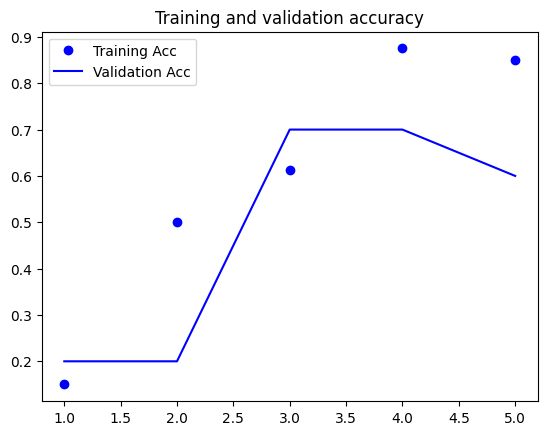

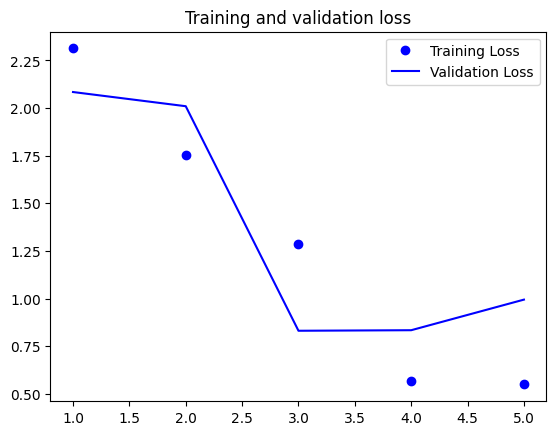

In [73]:
import matplotlib.pyplot as plt

epochs = range(1, len(val_acc) +1)
plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [74]:
folder = '/content/gdrive/MyDrive/pytest_img/cats_dogs'
files = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
print("Working with {0} images".format(len(files)))

Working with 60 images


cat.0.jpg


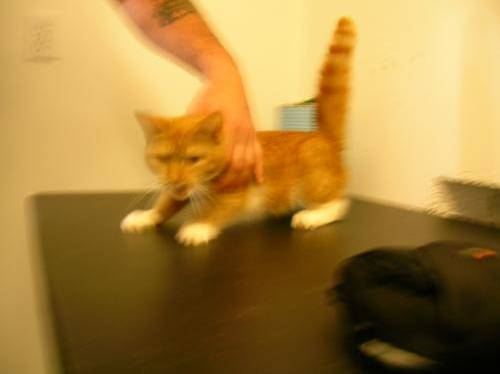

cat.14.jpg


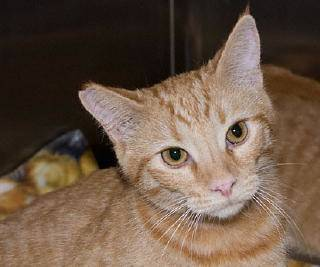

In [75]:
# 처음 두 개만 출력
for i in range(0, 2):
  print(files[i])
  display(_Imgdis(filename=folder + "/" + files[i], width=120, height=160))

In [76]:
from tensorflow.keras.utils import array_to_img, img_to_array, load_img

file_names = []
file_labels = []

for _file in files:
  file_names.append(_file)
  label_start = 0 # 라벨의 시작 위치
  label_end = _file.find(".") # 라벨의 끝 위치
  label_str = _file[label_start:label_end]

  if label_str == "cat":
    file_labels.append(0)
  elif label_str == "dog":
    file_labels.append(1)
  else:
    print("Error!")

print("Files in folder: %d" % len(file_names))

Files in folder: 60


In [77]:
# 모든 이미지의 size를 20 x 20 에 맞추기로 한다
image_height = 20
image_width = 20
channels = 3
dataset = np.ndarray(shape=(len(file_names), image_height, image_width,channels), dtype=np.int32)

print(dataset.shape) # (25000, 20, 20, 3)
#(25000, 20, 20, 3)을 담을 수 있는 dataset 변수 준비

(60, 20, 20, 3)


In [78]:
# 사이즈가 조절된 이미지를 저장할 디렉토리를 생성한다
import os
if not os.path.exists(os.path.join(folder, 'new/')):
  os.makedirs(os.path.join(folder, 'new/'))

In [79]:
%pwd

'/content/gdrive/MyDrive/pytest_img/mnist_jpg'

In [80]:
%cd ..

/content/gdrive/MyDrive/pytest_img


In [81]:
%ls

ants_bees/  CIFAR10/  facades/  img_align_celeba_small/            iris.csv    models/  opencv/
cats_dogs/  dlib/     images/   Intel_Image_Classification_small/  mnist_jpg/  OCR/     YOLO/


In [82]:
%cd ./cats_dogs/new

/content/gdrive/MyDrive/pytest_img/cats_dogs/new


In [83]:
%ls

cat.0.jpg   cat.17.jpg  cat.24.jpg  cat.4.jpg   dog.11.jpg  dog.19.jpg  dog.26.jpg  dog.6.jpg
cat.10.jpg  cat.18.jpg  cat.25.jpg  cat.5.jpg   dog.12.jpg  dog.1.jpg   dog.27.jpg  dog.7.jpg
cat.11.jpg  cat.19.jpg  cat.26.jpg  cat.6.jpg   dog.13.jpg  dog.20.jpg  dog.28.jpg  dog.8.jpg
cat.12.jpg  cat.1.jpg   cat.27.jpg  cat.7.jpg   dog.14.jpg  dog.21.jpg  dog.29.jpg  dog.9.jpg
cat.13.jpg  cat.20.jpg  cat.28.jpg  cat.8.jpg   dog.15.jpg  dog.22.jpg  dog.2.jpg
cat.14.jpg  cat.21.jpg  cat.29.jpg  cat.9.jpg   dog.16.jpg  dog.23.jpg  dog.3.jpg
cat.15.jpg  cat.22.jpg  cat.2.jpg   dog.0.jpg   dog.17.jpg  dog.24.jpg  dog.4.jpg
cat.16.jpg  cat.23.jpg  cat.3.jpg   dog.10.jpg  dog.18.jpg  dog.25.jpg  dog.5.jpg


In [84]:
import os

# 특정 디렉토리 경로 설정 (현재 디렉토리: '.')
directory_path = '.'

# 디렉토리 내의 파일 및 디렉토리 목록 가져오기
files_and_dirs = os.listdir(directory_path)

# 총 파일 수 계산 (디렉토리는 제외)
file_count = sum(1 for item in files_and_dirs if os.path.isfile(os.path.join(directory_path, item)))

file_count

60

In [85]:
#파일의 크기를 조절한 뒤, 이제까지의 과정을 저장한다
from PIL import Image

for count, item in enumerate(file_names):
  img = load_img(file_names[count])
  img = img.resize((20, 20), Image.Resampling.LANCZOS)
  img.save(fp=os.path.join(folder, 'new/')+file_names[count])

# 모든 파일 크기 조절
# ※ Image.Resampling.LANCZOS :
# LANCZOS 함수를 이용하여 이미지의 해상도를 낮추면서 생기는 계단 현상 등의 문제를 보정
# 이 외에 NEAREST, BILINEAR, BICUBIC, HAMMING, BOX 등이 있음

In [86]:
%ls

cat.0.jpg   cat.17.jpg  cat.24.jpg  cat.4.jpg   dog.11.jpg  dog.19.jpg  dog.26.jpg  dog.6.jpg
cat.10.jpg  cat.18.jpg  cat.25.jpg  cat.5.jpg   dog.12.jpg  dog.1.jpg   dog.27.jpg  dog.7.jpg
cat.11.jpg  cat.19.jpg  cat.26.jpg  cat.6.jpg   dog.13.jpg  dog.20.jpg  dog.28.jpg  dog.8.jpg
cat.12.jpg  cat.1.jpg   cat.27.jpg  cat.7.jpg   dog.14.jpg  dog.21.jpg  dog.29.jpg  dog.9.jpg
cat.13.jpg  cat.20.jpg  cat.28.jpg  cat.8.jpg   dog.15.jpg  dog.22.jpg  dog.2.jpg
cat.14.jpg  cat.21.jpg  cat.29.jpg  cat.9.jpg   dog.16.jpg  dog.23.jpg  dog.3.jpg
cat.15.jpg  cat.22.jpg  cat.2.jpg   dog.0.jpg   dog.17.jpg  dog.24.jpg  dog.4.jpg
cat.16.jpg  cat.23.jpg  cat.3.jpg   dog.10.jpg  dog.18.jpg  dog.25.jpg  dog.5.jpg


In [87]:
#크기 조절된 파일을 넘파이 배열로 변환한다
for count, item in enumerate(file_names):
  img = load_img(os.path.join(folder, 'new/')+file_names[count])
  img_array = img_to_array(img)
  dataset[count] = img_array

  if count % 500 == 0:
    print(f"{count} images to array")

print("All images to array!")

0 images to array
All images to array!


In [89]:
#한 개 이미지 파일을 열어 변환 결과를 확인한다
print(dataset.shape) # (25000, 20, 20, 3)
print(file_labels[30]) # 0 (cat)
display(_Imgdis(filename=os.path.join(folder, 'new/') + "/" + files[30], width=100, height=100))

(60, 20, 20, 3)
1


In [90]:
#한 개 이미지 파일의 변환 결과 확인
np.set_printoptions(linewidth=np.inf)
print(dataset[30, :, :, 0])

[[ 66  70  87 106 124 152 171 167 152 133 151 145 159 163 127 150 152 151 147 145]
 [ 88  83 103 125 125 118 122 124 108 102 116 102  89 122 116 115 127 125 122 116]
 [ 72  80 118 148 135 111 113 122 107  93  85  87  60 105 119 103 111 111 113 114]
 [ 85 100 121 121 106 115 142 156 158 134  97 118 109 129 127 117 107 107 112 123]
 [103 120 119  92  91 123 128  93 150 162 123 127 135 127 104 113 127 119 112 113]
 [100 103  83  56  78 125 102  27 112 182 188 148 154 141 129 160 180 163 136 115]
 [104  74  35  15  48  99 102  60  73 151 215 149 131 110 124 174 212 200 171 134]
 [ 74  49  37  45  63  84  87  72 115 160 253 187 144 102 133 194 201 202 179 143]
 [ 56  63  47  41  44  84  91 130 129 231 246 194 203 143 106 224 245 172 214 133]
 [ 47  30  38  29  47  90 113 119 175 213 175 242 207 180 115 238 180 175 200 118]
 [ 66  42  73  55  59  78 107  93 144 157 183 255 233 175 168 227 106 159 137  77]
 [ 52  44  68  49  37  42  78 110 116 148 239 245 225 158 205 160  90 160  88  64]
 [ 6

In [91]:
from sklearn.model_selection import train_test_split
train_images, test_images, train_labels, test_labels = train_test_split(dataset, file_labels, test_size=0.2)
print("Train set size: {0}, Test set size: {1}".format(len(train_images), len(test_images)))

Train set size: 48, Test set size: 12


In [92]:
from tensorflow.keras import models
from tensorflow.keras import layers
import numpy as np
model = models.Sequential()
model.add(layers.Conv2D(32, kernel_size=(3, 3), input_shape=(20, 20, 3), activation='relu'))
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 18, 18, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 8, 8, 64)          0         
                                                                 
 flatten_3 (Flatten)         (None, 4096)              0         
                                                                 
 dense_6 (Dense)             (None, 128)               524416    
                                                      

In [93]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])

# 데이터 reshape 및 스케일링
print("before:", train_images.shape)
train_images = train_images.reshape((len(train_images), 20, 20, 3))
train_images = train_images.astype('float32')/255
test_images = test_images.reshape((len(test_images), 20, 20, 3))
test_images = test_images.astype('float32')/255

print("after:", train_images.shape)

before: (48, 20, 20, 3)
after: (48, 20, 20, 3)


In [94]:
train_images

array([[[[0.58431375, 0.5764706 , 0.5294118 ],
         [0.6313726 , 0.62352943, 0.5764706 ],
         [0.54509807, 0.5372549 , 0.49019608],
         ...,
         [0.5921569 , 0.5764706 , 0.53333336],
         [0.57254905, 0.5568628 , 0.5137255 ],
         [0.5803922 , 0.5647059 , 0.52156866]],

        [[0.58431375, 0.5764706 , 0.5294118 ],
         [0.6313726 , 0.62352943, 0.5764706 ],
         [0.5686275 , 0.56078434, 0.5137255 ],
         ...,
         [0.5882353 , 0.57254905, 0.5294118 ],
         [0.58431375, 0.5686275 , 0.5254902 ],
         [0.59607846, 0.5803922 , 0.5372549 ]],

        [[0.58431375, 0.5764706 , 0.5294118 ],
         [0.62352943, 0.6156863 , 0.5686275 ],
         [0.5882353 , 0.5803922 , 0.53333336],
         ...,
         [0.57254905, 0.5647059 , 0.5176471 ],
         [0.5764706 , 0.5686275 , 0.52156866],
         [0.5882353 , 0.5803922 , 0.53333336]],

        ...,

        [[0.57254905, 0.5921569 , 0.5686275 ],
         [0.54509807, 0.5647059 , 0.5411765 ]

In [95]:
# 넘파이 배열로 변환
# 이진 분류이므로 종속변수에 대해 원-핫 인코딩 없이 리스트를 넘파이 배열로만 변환해준다
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

In [96]:
history = model.fit(train_images, train_labels, epochs=50, batch_size=128, validation_data=(test_images, test_labels))

Epoch 1/50
1/1 [==============================] - 2s 2s/step - loss: 0.6761 - acc: 0.5833 - val_loss: 0.6878 - val_acc: 0.5000
Epoch 2/50
1/1 [==============================] - 0s 273ms/step - loss: 0.6690 - acc: 0.5833 - val_loss: 1.2261 - val_acc: 0.5000
Epoch 3/50
1/1 [==============================] - 0s 268ms/step - loss: 1.2586 - acc: 0.5000 - val_loss: 0.9018 - val_acc: 0.5000
Epoch 4/50
1/1 [==============================] - 0s 258ms/step - loss: 0.9723 - acc: 0.5000 - val_loss: 0.6971 - val_acc: 0.5833
Epoch 5/50
1/1 [==============================] - 0s 267ms/step - loss: 0.6789 - acc: 0.6667 - val_loss: 0.6970 - val_acc: 0.5833
Epoch 6/50
1/1 [==============================] - 0s 243ms/step - loss: 0.6768 - acc: 0.6458 - val_loss: 0.6963 - val_acc: 0.5833
Epoch 7/50
1/1 [==============================] - 0s 247ms/step - loss: 0.6839 - acc: 0.5208 - val_loss: 0.6974 - val_acc: 0.5833
Epoch 8/50
1/1 [==============================] - 0s 213ms/step - loss: 0.6678 - acc: 0.6458 

In [97]:
print("Test Data Accuracy:", model.evaluate(test_images, test_labels))

1/1 [==============================] - 0s 47ms/step - loss: 1.2807 - acc: 0.2500
Test Data Accuracy: [1.280678629875183, 0.25]


In [98]:
model.predict(test_images)

1/1 [==============================] - 0s 207ms/step


array([[0.60700774],
       [0.36492854],
       [0.42129585],
       [0.14177407],
       [0.8156721 ],
       [0.16105464],
       [0.44364086],
       [0.03561048],
       [0.8688926 ],
       [0.7159193 ],
       [0.61644197],
       [0.08519764]], dtype=float32)

In [103]:
history

In [99]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
print('Accuracy of each epoch:', acc)
print()
print('Validation Accuracy of each epoch:', val_acc)

Accuracy of each epoch: [0.5833333134651184, 0.5833333134651184, 0.5, 0.5, 0.6666666865348816, 0.6458333134651184, 0.5208333134651184, 0.6458333134651184, 0.625, 0.7083333134651184, 0.6666666865348816, 0.7083333134651184, 0.8125, 0.7708333134651184, 0.7916666865348816, 0.7916666865348816, 0.7291666865348816, 0.6666666865348816, 0.5, 0.5208333134651184, 0.9166666865348816, 0.875, 0.9583333134651184, 0.9375, 0.8958333134651184, 0.8958333134651184, 0.9583333134651184, 0.9375, 0.9375, 0.7708333134651184, 0.5, 0.75, 0.8958333134651184, 0.9375, 0.9583333134651184, 0.9375, 0.875, 0.8333333134651184, 0.875, 1.0, 0.9791666865348816, 1.0, 0.9791666865348816, 0.9791666865348816, 0.9375, 0.8125, 0.9583333134651184, 0.9583333134651184, 1.0, 0.9791666865348816]

Validation Accuracy of each epoch: [0.5, 0.5, 0.5, 0.5833333134651184, 0.5833333134651184, 0.5833333134651184, 0.5833333134651184, 0.5, 0.5, 0.5, 0.4166666567325592, 0.4166666567325592, 0.4166666567325592, 0.5, 0.4166666567325592, 0.5, 0.333

In [100]:
print('Loss of each epoch:', np.round(loss, 3))
print()
print('Validation Loss of each epoch:', np.round(val_loss, 3))

Loss of each epoch: [0.676 0.669 1.259 0.972 0.679 0.677 0.684 0.668 0.666 0.661 0.669 0.647 0.64  0.618 0.616 0.589 0.6   0.589 0.728 0.668 0.574 0.555 0.518 0.477 0.482 0.467 0.435 0.39  0.382 0.447 0.973 0.545 0.462 0.398 0.352 0.325 0.33  0.369 0.346 0.293 0.226 0.225 0.218 0.222 0.281 0.323 0.247 0.192 0.14  0.134]

Validation Loss of each epoch: [0.688 1.226 0.902 0.697 0.697 0.696 0.697 0.7   0.702 0.705 0.707 0.711 0.721 0.718 0.733 0.73  0.76  0.901 0.776 0.741 0.762 0.765 0.785 0.799 0.792 0.822 0.821 0.861 0.909 1.561 0.807 0.81  0.838 0.878 0.901 0.977 1.049 1.054 1.006 1.019 1.068 1.064 1.181 1.164 1.382 1.078 1.102 1.181 1.221 1.281]


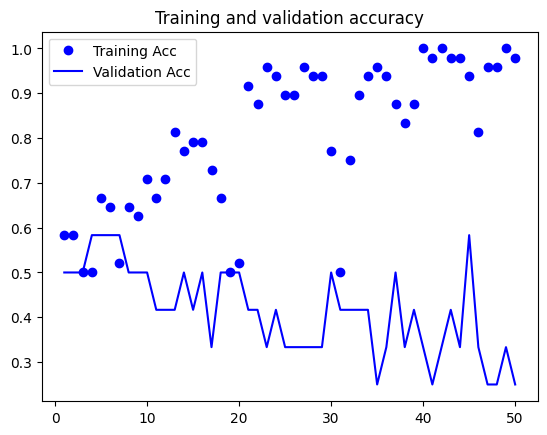

In [101]:
import matplotlib.pyplot as plt
epochs = range(1, len(acc) +1)
plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Training and validation accuracy')
plt.legend()

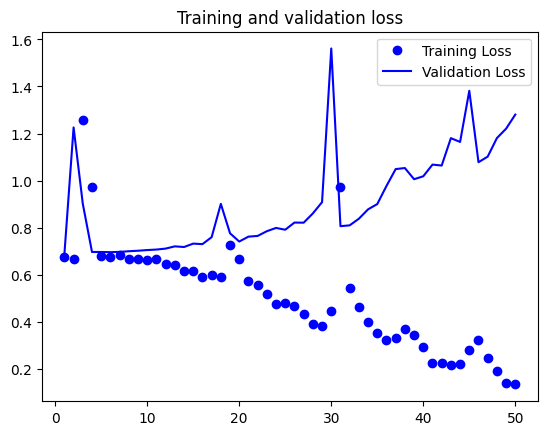

In [102]:
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()